In [1]:
import pandas as pd # importa a biblioteca pandas

In [3]:
df = pd.read_csv('Social_Network_Ads (1).csv',sep=',') # faz a importação da base de dados Social Network csv

In [5]:
df.head() # exibe as primeiras linhas do dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# Criando um dicionário para substituir o nome de cada coluna
dicionario = {
    'User ID':'Usuario', 'Gender':'Genero',
    'Age':'Idade',
    'EstimatedSalary':'Salario Estimado',
    'Purchased':'Comprou'
}

In [7]:
df.rename(columns=dicionario, inplace=True) # renomeia as colunas

In [8]:
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Importando as bibliotecas necessárias para realizar a análise de dados

In [9]:
import numpy as np #importa a biblioteca numpy
import matplotlib.pyplot as plt
from sklearn.svm import SVC #importa o algoritmo de svm
from sklearn.preprocessing import StandardScaler # biblioteca para normalizar os dados
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score # biblioteca para gerar as métricas
from matplotlib.colors import ListedColormap # biblioteca para alterar cor dos gráficos

Selecionando as colunas do dataframe 

In [10]:
X = df.iloc[:, [2, 3]].values # pega os valores da primeira coluna até a coluna 3
y = df.iloc[:, -1].values # pega a saída do dataframe

In [12]:
#y

Normalizando dos dados com Stand Scaler

In [13]:
sc = StandardScaler() # biblioteca para normalizar os dados

Dividindo os dados em treino e teste

In [30]:
from sklearn.model_selection import train_test_split # biblioteca para dividir
# os dados em treino e teste

Dividindo os dados em treino e teste

In [31]:
X_treino,X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,
                                                       random_state=3)

In [32]:
# Normalizando os dados do X_treino e X_teste
X_treino = sc.fit_transform(X_treino)
X_teste = sc.fit_transform(X_teste)

In [33]:
# Criando o algoritmo de ML - Machine Learning SVM
algoritmo = SVC(kernel='linear',random_state=3)

In [34]:
# Treinando o algoritmo de Machine Learning
algoritmo.fit(X_treino,y_treino)

SVC(kernel='linear', random_state=3)

In [35]:
# Realizando as predições 
y_prev = algoritmo.predict(X_teste)

In [ ]:
# Exibindo X_teste
X_teste

In [38]:
# Aplicando a transformada inversa nos dados    
x_teste_padrao = sc.inverse_transform(X_teste)

In [ ]:
x_teste_padrao

In [40]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_teste,y_prev)
cm

array([[72,  6],
       [13, 29]], dtype=int64)

Importa a biblioteca seaborn    

In [41]:
import seaborn as sns

Text(70.72222222222221, 0.5, 'Real')

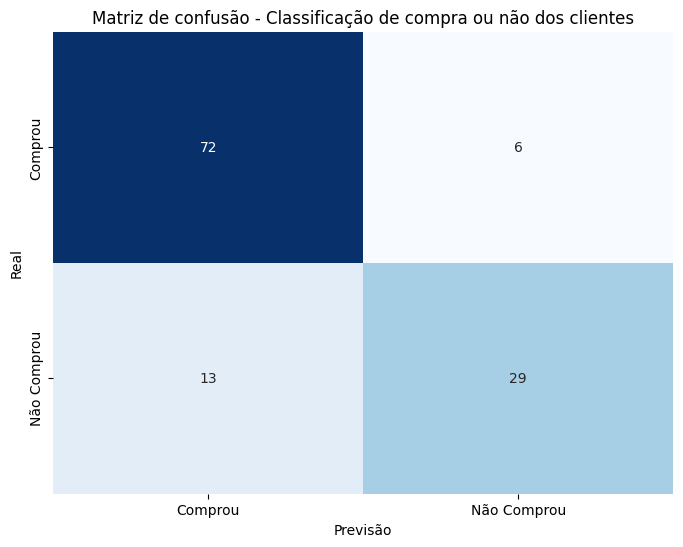

In [43]:
plt.figure(figsize=(8,6)) # define o tamanho da figura
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Comprou', 'Não Comprou'], yticklabels=['Comprou','Não Comprou'])
plt.title('Matriz de confusão - Classificação de compra ou não dos clientes')
plt.xlabel('Previsão')
plt.ylabel('Real')

In [45]:
# Calculando as métricas
acc = accuracy_score(y_teste,y_prev)
acc
# acuracia = VP +VN /Total

0.8416666666666667

In [47]:
# Calculando as métricas Precisao
prec = precision_score(y_teste,y_prev)
prec
# precisao = VP / (VP + FN)

0.8285714285714286